In [1]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
# Read in data
df = pd.read_csv('./Resources/filmtv_movies - ENG.csv')
df

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,0,0,0,0,0


In [3]:
print(df.shape)

(40303, 17)


In [4]:
# Check Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  humor         40303 non-null  int64  
 13  rhythm        40303 non-null  int64  
 14  effort        40303 non-null  int64  
 15  tension       40303 non-null  int64  
 16  erotism       40303 non-null  int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 5.2+ MB


In [5]:
# Drop duplicates in data set
df.drop_duplicates()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,0,0,0,0,0


In [6]:
# Drop null data and read data
df = df.dropna()
df.head()

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,1,2,0,2,0


In [7]:
# Create new csv of cleaned data
clean_data=df.to_csv("clean_data.csv", index=True)

In [8]:
# Drop Useless columns
df.drop(['filmtv_id','title','directors'],axis=1,inplace=True)
df.head()

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,genre,duration,country,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
1,1991,Drama,98,Italy,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0
2,1976,Romantic,91,United States,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0
3,1982,Comedy,95,United States,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2
4,1942,Comedy,85,Italy,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0
5,1978,Spy,117,"Italy, Germany, Israel","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,1,2,0,2,0


In [9]:
df.describe()

,year,duration,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism
count,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000,33432.000000
mean,1990.687635,101.698433,5.886594,5.774753,6.028715,41.150455,0.655031,1.544748,0.757239,1.073283,0.353195
std,23.667148,25.360573,1.359514,1.591284,1.441867,72.580917,0.924257,1.098851,1.133063,1.111187,0.667636
min,1910.000000,41.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,90.000000,5.000000,4.630000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1997.000000,98.000000,6.000000,6.000000,6.000000,14.000000,0.000000,2.000000,0.000000,1.000000,0.000000
75%,2010.000000,109.000000,6.900000,7.000000,7.000000,42.000000,1.000000,2.000000,1.000000,2.000000,1.000000
max,2023.000000,1525.000000,10.000000,10.000000,10.000000,1056.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [10]:
# Unique value types of each column
unique=df.nunique()
print(unique)

year              113
genre              27
duration          247
country          1746
actors          33318
avg_vote           89
critics_vote      606
public_vote        10
total_votes       564
humor               6
rhythm              6
effort              6
tension             6
erotism             5
dtype: int64


In [11]:
# Print out the Country value counts
country_counts=df.country.value_counts()
country_counts.head()

United States    13561
Italy             6795
France            1851
Great Britain     1640
Germany            592
Name: country, dtype: int64

<AxesSubplot:ylabel='Density'>

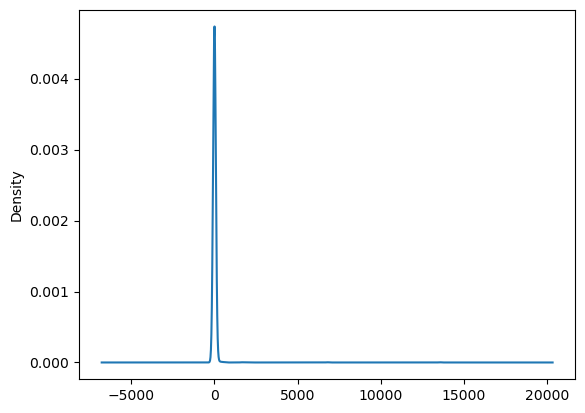

In [12]:
# Visualize the value counts
country_counts.plot.density()

In [13]:
all_actors=df['actors'].str.cat(sep=', ')
actors_list=all_actors.split(', ')
actors_dict={}
for each_actor in actors_list: 
    if each_actor in actors_dict: 
        actors_dict[each_actor]+=1
    else: 
        actors_dict[each_actor]=1
actors_dict

{'Kim Rossi Stuart': 27,
 'Simona Cavallari': 9,
 'Ennio Fantastichini': 54,
 'Orso Maria Guerrini': 16,
 'Silli Togni': 3,
 'Maria Pia Calzone': 11,
 'Luciano Curreli': 8,
 'Francesco Maria Dominedò': 1,
 'Michael Craig': 12,
 'John Meillon': 9,
 'Eva Griffith': 1,
 'Graham Rouse': 2,
 'Robert Bettles': 1,
 'Alfred Bell': 1,
 'John Meillon Jr.': 1,
 'Mickey Rourke': 46,
 'Steve Guttenberg': 24,
 'Ellen Barkin': 38,
 'Daniel Stern': 19,
 'Kevin Bacon': 49,
 'Timothy Daly': 5,
 'Paul Reiser': 14,
 'Kelle Kipp': 1,
 'Colette Blonigan': 1,
 'Eduardo De Filippo': 39,
 'Peppino De Filippo': 78,
 'Clelia Matania': 25,
 'Paolo Stoppa': 72,
 'Nario Bernardi': 1,
 'Augusto Di Giovanni': 3,
 'Edwige Maul': 1,
 'Italia Marchesini': 1,
 'Fabio Testi': 43,
 'Janet Agren': 36,
 'Assaf Dayan': 2,
 'Siegfried Rauch': 6,
 'Oded Kotler': 1,
 'Gianni Rizzo': 11,
 'Herbert Fux': 7,
 'Gian Maria Volonté': 50,
 'Irene Papas': 31,
 'Gabriele Ferzetti': 68,
 'Salvo Randone': 26,
 'Laura Nucci': 4,
 'Mario Sca

In [14]:
def sort_dict_by_value(d, reverse = False):
    return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))

actors_dict=sort_dict_by_value(actors_dict, reverse=True)

In [15]:
top_100_actors=list(actors_dict.keys())[:100]
top_100_actors

['Alberto Sordi',
 'Marcello Mastroianni',
 'Ugo Tognazzi',
 'Gérard Depardieu',
 'Totò',
 'Michael Caine',
 'Franco Franchi',
 'Ciccio Ingrassia',
 'Vittorio Gassman',
 'Robert De Niro',
 'Franco Nero',
 'Giancarlo Giannini',
 'Vittorio De Sica',
 'Donald Sutherland',
 'Stefania Sandrelli',
 'Michele Placido',
 'Willem Dafoe',
 'Nicolas Cage',
 'Alessandro Haber',
 'Nino Manfredi',
 'Christopher Lee',
 'Samuel L. Jackson',
 'Harvey Keitel',
 'Lino Banfi',
 'John Wayne',
 'Mario Carotenuto',
 'Luca Zingaretti',
 'Michel Piccoli',
 'Tomas Milian',
 'Peppino De Filippo',
 'Morgan Freeman',
 'Walter Chiari',
 'Anthony Hopkins',
 'Isabelle Huppert',
 'Robert Mitchum',
 'Christopher Walken',
 'Paolo Villaggio',
 'Susan Sarandon',
 'Christian De Sica',
 'Bruce Willis',
 'Bud Spencer',
 'Rutger Hauer',
 'Philippe Leroy',
 'Catherine Deneuve',
 'Diego Abatantuono',
 'Paolo Stoppa',
 'Sophia Loren',
 'Ornella Muti',
 'Robert Duvall',
 'Max Von Sydow',
 'Gene Hackman',
 'Renzo Montagnani',
 'Joh

In [16]:
def has_top_actor(actor_list, top_list): 
    for each_actor in actor_list: 
        if each_actor in top_list: 
            return True
    return False

In [17]:
# get binary indicator
df['has_top_actor']=df['actors'].fillna('').apply(lambda x: has_top_actor(x.split(', '), top_100_actors))

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# get top 5 country
top_5_country=list(df['country'].value_counts().head(n=5).index)
# 

df['country_grouped']=df['country'].apply(lambda x: x if x in top_5_country else 'other')
df['country_grouped'].value_counts()

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


United States    13561
other             8993
Italy             6795
France            1851
Great Britain     1640
Germany            592
Name: country_grouped, dtype: int64

In [19]:
df.head()

,year,genre,duration,country,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,has_top_actor,country_grouped
1,1991,Drama,98,Italy,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,0,2,0,2,0,False,Italy
2,1976,Romantic,91,United States,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,1,2,1,0,0,False,United States
3,1982,Comedy,95,United States,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,2,2,0,1,2,False,United States
4,1942,Comedy,85,Italy,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,3,1,1,0,0,True,Italy
5,1978,Spy,117,"Italy, Germany, Israel","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,1,2,0,2,0,False,other


In [20]:
# Create the OneHotEncoder instance
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
#encode_df = pd.DataFrame(enc.fit_transform(df.genre.values.reshape(-1,1)))

# Rename encoded columns
#encode_df.columns = enc.get_feature_names(['genre'])
#encode_df.head()

In [21]:
#df=df.merge(encode_df,left_index=True,right_index=True).drop("genre",1)
#df

In [22]:
# get top 5 genres
top_5_genre=list(df['genre'].value_counts().head(n=5).index)
#[8, 5, 24, 13, 0]

df['genre_grouped']=df['genre'].apply(lambda x: x if x in top_5_genre else 999)
df['genre_grouped'].value_counts()


C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Drama       10657
Comedy       8264
999          7947
Thriller     2742
Horror       2098
Action       1724
Name: genre_grouped, dtype: int64

In [23]:
def change_string(avg_vote):
    if avg_vote >= 7:
        return 1
    else:
        return 0
df["avg_vote"]=df["avg_vote"].apply(change_string)
df.head()

C:\Users\Kristina Andrews\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,genre,duration,country,actors,avg_vote,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,has_top_actor,country_grouped,genre_grouped
1,1991,Drama,98,Italy,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",0,6.00,7.0,4,0,2,0,2,0,False,Italy,Drama
2,1976,Romantic,91,United States,"Michael Craig, John Meillon, Eva Griffith, Gra...",0,6.00,5.0,9,1,2,1,0,0,False,United States,999
3,1982,Comedy,95,United States,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",1,8.00,6.0,18,2,2,0,1,2,False,United States,Comedy
4,1942,Comedy,85,Italy,"Eduardo De Filippo, Peppino De Filippo, Clelia...",0,5.33,7.0,15,3,1,1,0,0,True,Italy,Comedy
5,1978,Spy,117,"Italy, Germany, Israel","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",0,3.50,6.0,3,1,2,0,2,0,False,other,999


In [24]:
# Rename avg_vote column  to avg_vote>=
df=df.rename({"avg_vote":"avg_vote >= 7"},axis=1)
df.head()

,year,genre,duration,country,actors,avg_vote >= 7,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,has_top_actor,country_grouped,genre_grouped
1,1991,Drama,98,Italy,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",0,6.00,7.0,4,0,2,0,2,0,False,Italy,Drama
2,1976,Romantic,91,United States,"Michael Craig, John Meillon, Eva Griffith, Gra...",0,6.00,5.0,9,1,2,1,0,0,False,United States,999
3,1982,Comedy,95,United States,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",1,8.00,6.0,18,2,2,0,1,2,False,United States,Comedy
4,1942,Comedy,85,Italy,"Eduardo De Filippo, Peppino De Filippo, Clelia...",0,5.33,7.0,15,3,1,1,0,0,True,Italy,Comedy
5,1978,Spy,117,"Italy, Germany, Israel","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",0,3.50,6.0,3,1,2,0,2,0,False,other,999


In [25]:
df.drop(["genre","country","actors"],axis=1,inplace=True)


In [26]:
# Define the features set.
X = df.copy()
X = pd.get_dummies(X, columns=['genre_grouped', 'country_grouped',"has_top_actor"])
X = X.drop(["avg_vote >= 7","has_top_actor_False"], axis=1)
X.head()

,year,duration,critics_vote,public_vote,total_votes,humor,rhythm,effort,tension,erotism,...,genre_grouped_Drama,genre_grouped_Horror,genre_grouped_Thriller,country_grouped_France,country_grouped_Germany,country_grouped_Great Britain,country_grouped_Italy,country_grouped_United States,country_grouped_other,has_top_actor_True
1,1991,98,6.00,7.0,4,0,2,0,2,0,...,1,0,0,0,0,0,1,0,0,0
2,1976,91,6.00,5.0,9,1,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1982,95,8.00,6.0,18,2,2,0,1,2,...,0,0,0,0,0,0,0,1,0,0
4,1942,85,5.33,7.0,15,3,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
5,1978,117,3.50,6.0,3,1,2,0,2,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
df.columns

Index(['year', 'duration', 'avg_vote >= 7', 'critics_vote', 'public_vote',
       'total_votes', 'humor', 'rhythm', 'effort', 'tension', 'erotism',
       'has_top_actor', 'country_grouped', 'genre_grouped'],
      dtype='object')

In [28]:
# Define the target set.
y = df["avg_vote >= 7"].ravel()
y[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [29]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [30]:
# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [43]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [33]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [34]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,6228,130
Actual 1,168,1832


In [35]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6228,130
Actual 1,168,1832


Accuracy Score : 0.9643455372098588
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      6358
           1       0.93      0.92      0.92      2000

    accuracy                           0.96      8358
   macro avg       0.95      0.95      0.95      8358
weighted avg       0.96      0.96      0.96      8358



In [37]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.43384031754975466, 'critics_vote'),
 (0.3113260020751542, 'public_vote'),
 (0.0463773787298895, 'year'),
 (0.0396487703574919, 'total_votes'),
 (0.03436179339454361, 'duration'),
 (0.03350209863519109, 'effort'),
 (0.021766318401410092, 'tension'),
 (0.015924885061461218, 'rhythm'),
 (0.011375617922714453, 'genre_grouped_Drama'),
 (0.008320852744799429, 'humor'),
 (0.006545211069564859, 'erotism'),
 (0.006393071020812167, 'country_grouped_Italy'),
 (0.004976820625776866, 'country_grouped_other'),
 (0.004192077984807251, 'country_grouped_United States'),
 (0.003964817746691443, 'has_top_actor_True'),
 (0.003675124998863563, 'genre_grouped_999'),
 (0.003351092744962272, 'genre_grouped_Comedy'),
 (0.002209226419193482, 'country_grouped_France'),
 (0.002057355027921477, 'genre_grouped_Thriller'),
 (0.0020086259455210976, 'country_grouped_Great Britain'),
 (0.0016676744779131295, 'genre_grouped_Horror'),
 (0.0015230175404800787, 'genre_grouped_Action'),
 (0.000991849525082087, 'country_

In [40]:
# Testing with random forest machine learning with only certain variables
X=df[["humor","tension","rhythm","erotism","effort"]]
y = df["avg_vote >= 7"].ravel()
y[:5]
X.head()

,humor,tension,rhythm,erotism,effort
1,0,2,2,0,0
2,1,0,2,0,1
3,2,1,2,2,0
4,3,0,1,0,1
5,1,2,2,0,0


In [41]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [42]:
# Creating a StandardScaler instance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [45]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [46]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [47]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,6009,349
Actual 1,1443,557


In [48]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [49]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6009,349
Actual 1,1443,557


Accuracy Score : 0.7855946398659966
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      6358
           1       0.61      0.28      0.38      2000

    accuracy                           0.79      8358
   macro avg       0.71      0.61      0.63      8358
weighted avg       0.76      0.79      0.75      8358



In [50]:
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4105634527436112, 'effort'),
 (0.22204896878925817, 'tension'),
 (0.15666412856618805, 'rhythm'),
 (0.11272744460424933, 'humor'),
 (0.09799600529669315, 'erotism')]